In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
basedir = 'Dataset'
train_dir = os.path.join(basedir, 'Train')
test_dir = os.path.join(basedir, 'Test')

In [7]:
train_Aiem_dir = os.path.join(train_dir, "Aiem")
train_Mean_dir = os.path.join(train_dir, "Mean")

test_Aiem_dir = os.path.join(test_dir, "Aiem")
test_Mean_dir = os.path.join(test_dir, "Mean")

In [11]:
num_train_Aiem = len(os.listdir(train_Aiem_dir))
num_train_Mean = len(os.listdir(train_Mean_dir))

num_test_Aiem = len(os.listdir(test_Aiem_dir))
num_test_Mean = len(os.listdir(test_Mean_dir))
print("Train Aiem {0}".format(num_train_Aiem))
print("Train Mean {0}".format(num_train_Mean))

print("Test Aiem {0}".format(num_test_Aiem))
print("Test Mean {0}".format(num_test_Mean))
print("All Train {0}".format(num_train_Aiem + num_train_Mean))
print("All Test {0}".format(num_test_Mean + num_test_Aiem))

Train Aiem 20
Train Mean 20
Test Aiem 10
Test Mean 10
All Train 40
All Test 20


In [12]:
train_image_gen = ImageDataGenerator(rescale=1./255)
test_image_gen = ImageDataGenerator(rescale=1./255)

In [18]:
train_data = train_image_gen.flow_from_directory(batch_size=100,
                                                directory= train_dir,
                                                shuffle=True,
                                                target_size=(150,150),
                                                class_mode='binary')
test_data = test_image_gen.flow_from_directory(batch_size=100,
                                                directory= test_dir,
                                                shuffle=True,
                                                target_size=(150,150),
                                                class_mode='binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


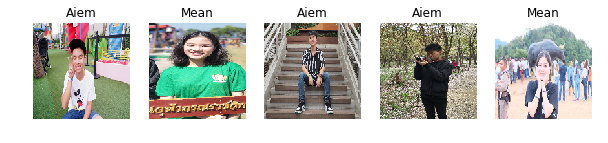

In [20]:
sample_image, sample_label = next(train_data)
def plotImages(images_arr):
    plt.figure(figsize=(10,9))
    for n in range(5):
        plt.subplot(1, 5 , n+1)
        plt.imshow(sample_image[n])
        if sample_label[n] == 0.0:
            plt.title("Aiem")
        else:
            plt.title("Mean")
        plt.axis('off')
plotImages(sample_image[:5])

In [21]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150, 3,))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
__________

In [25]:
history = model.fit_generator(
    train_data,
    epochs=20,
    validation_data=test_data,)

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 0.6937 - acc: 0.4250 - val_loss: 1.6918 - val_acc: 0.5000
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 1.7333 - acc: 0.5000 - val_loss: 0.9046 - val_acc: 0.5000
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 0.8207 - acc: 0.5000 - val_loss: 0.8355 - val_acc: 0.5000
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.7551 - acc: 0.5000 - val_loss: 0.6470 - val_acc: 0.5000
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.5611 - acc: 0.7500 - val_loss: 0.6055 - val_acc: 0.6000
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 0.5195 - acc: 0.7750 - val_loss: 0.5986 - val_acc: 0.5500
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.5006 - acc: 0.6750 - val_loss: 0.5466 - val_acc: 0.7000
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 0.4314 - acc: 0.9000 - val_loss: 0.4782 - 

In [26]:
test_image, test_label = next(test_data)
test_loss, test_acc = model.evaluate(test_image, test_label)

20/20 [==============================] - 0s 2ms/sample - loss: 0.2978 - acc: 0.8500


In [27]:
predictions = model.predict(test_image)
predictions[0]

array([0.7460882 , 0.25391173], dtype=float32)

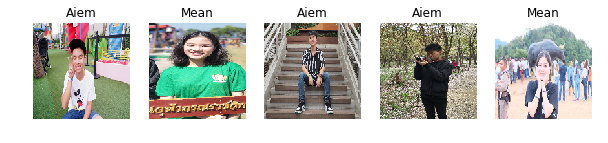

In [30]:
plotImages(test_image)

In [31]:
model.save('AiemModel.h5')